#     Plot altitude profile comparisons of aircraft and model data, and compare both with binned data


## Setup imports

In [1]:
import matplotlib.pyplot as plt

import notebook_prepare as pre

## Define plotting function

In [2]:
def plot_altitude_profile(full_df,df,plotdir,key,label,a_colour,m_colour,alt_bin,avg_method,min_method,max_method) :
    
    """
    Plot altitude profile comparisons of aircraft and model data.
    """

    # Define the figure.
    fig,ax = pre.setup_figure()

    # Define the data.
    alt_data = df['Altitude']
    a_min, a_avg, a_max, m_min, m_avg, m_max, bl_min, bl_avg, bl_max = pre.read_data_values(df)

    # Plot the data.
    plt.scatter(a_avg,alt_data,s=200,c=a_colour,label='Aircraft')
    plt.scatter(m_avg,alt_data,s=200,c=m_colour,label='Model')

    # Set the axes labels.
    plt.xlabel(label,fontsize=50,labelpad=10)
    plt.ylabel('Altitude / m',fontsize=50,labelpad=10)

    # Set the axes ticks.
    ax.tick_params(labelsize=30)

    # Add a legend.
    plt.legend(fontsize=30,markerscale=2)

    # Save the figure.
    #plt.savefig(plotdir+key+'_Altitude_Profile.png')
    #plt.close()
    plt.show()

    """
    Plot altitude profile comparisons of aircraft and model data with binned data.
    """

    # Define the figure.
    fig,ax = pre.setup_figure()

    # Define the data.
    binned_alt,a_min,a_avg,a_max,m_min,m_avg,m_max = pre.bin_altitude_data(full_df,avg_method,min_method,max_method,alt_bin)

    # Plot the data.
    plt.plot(a_avg,binned_alt,lw=5,c=a_colour,label='Aircraft')
    plt.fill_betweenx(binned_alt,a_min,a_max,fc=a_colour,ec=None,alpha=0.5)
    plt.plot(m_avg,binned_alt,lw=5,c=m_colour,label='Model')
    plt.fill_betweenx(binned_alt,m_min,m_max,fc=m_colour,ec=None,alpha=0.5)

    # Set the axes labels.
    plt.xlabel(label,fontsize=50,labelpad=10)
    plt.ylabel('Altitude / m',fontsize=50,labelpad=10)

    # Set the axes ticks.
    ax.tick_params(labelsize=30)

    # Add a legend.
    plt.legend(fontsize=30,markerscale=2)

    # Save the figure.
    #plt.savefig(plotdir+key+'_Altitude_Profile_Binned.png')
    #plt.close()
    plt.show()

## Specify the flight number

In [3]:
# Set the flight number.
# Current valid options are M270, M296 and M302.
flight_number = 'M296'  

## Prepare the data and plot for each pollution species

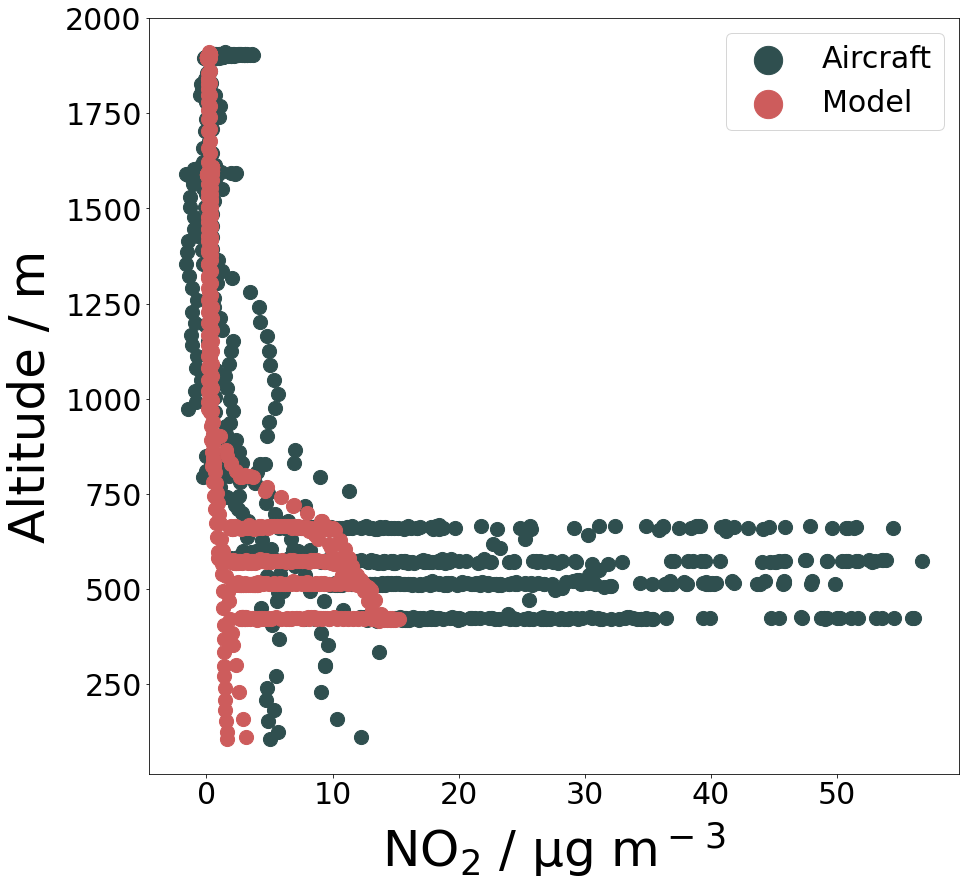

/net/home/h04/twilson/Documents/CAP/cap-notebooks/new flight plots/notebook_prepare.py:200: RuntimeWarning: Mean of empty slice
  a_avg.append(np.nanmean(temp_aircraft))
/net/home/h04/twilson/Documents/CAP/cap-notebooks/new flight plots/notebook_prepare.py:201: RuntimeWarning: Mean of empty slice
  m_avg.append(np.nanmean(temp_model))
/opt/scitools/environments/default/2021_03_18-1/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1366: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


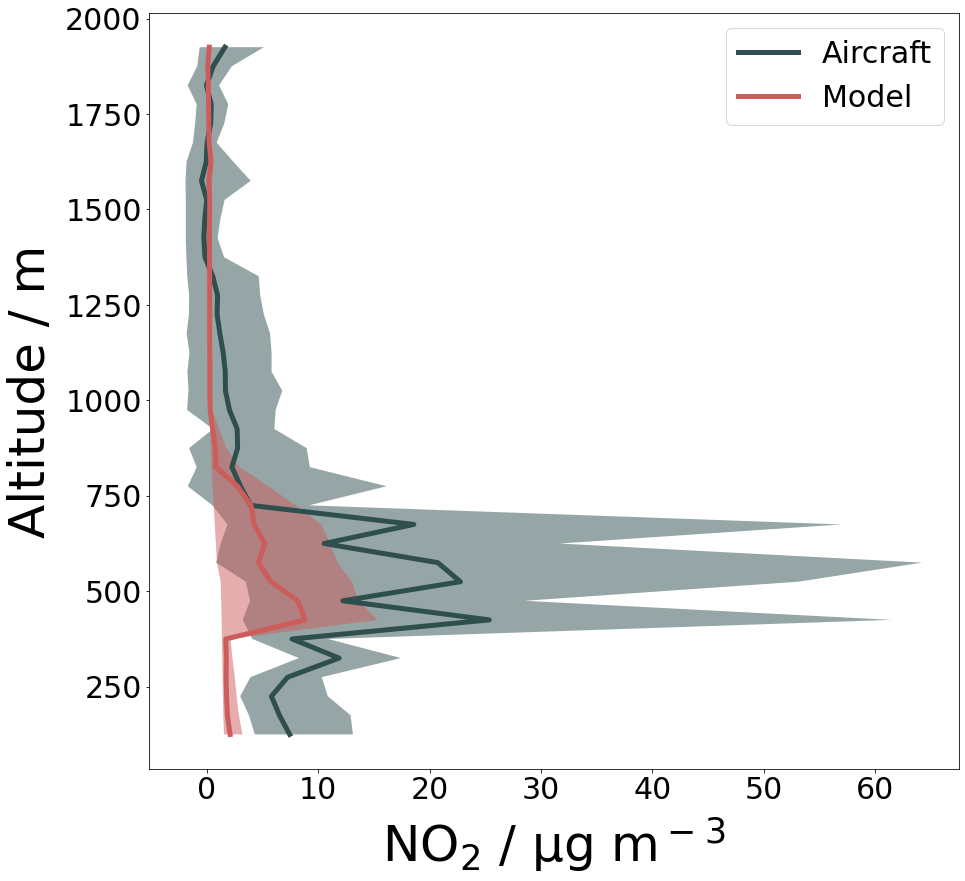

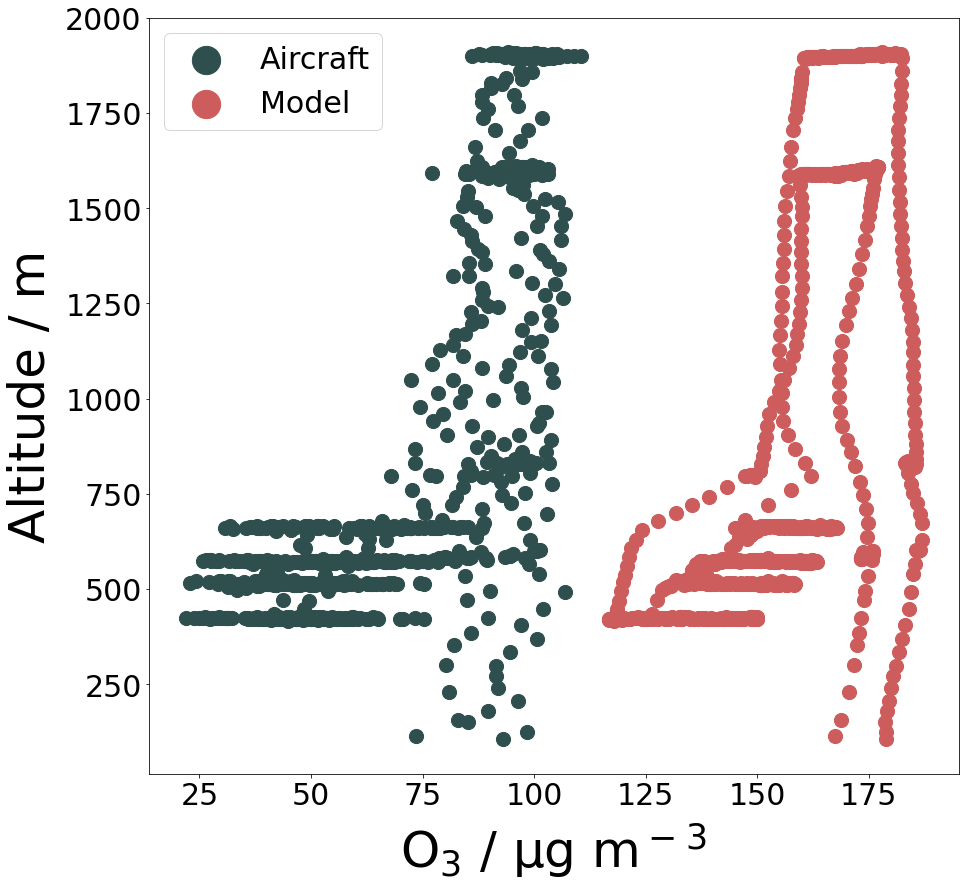

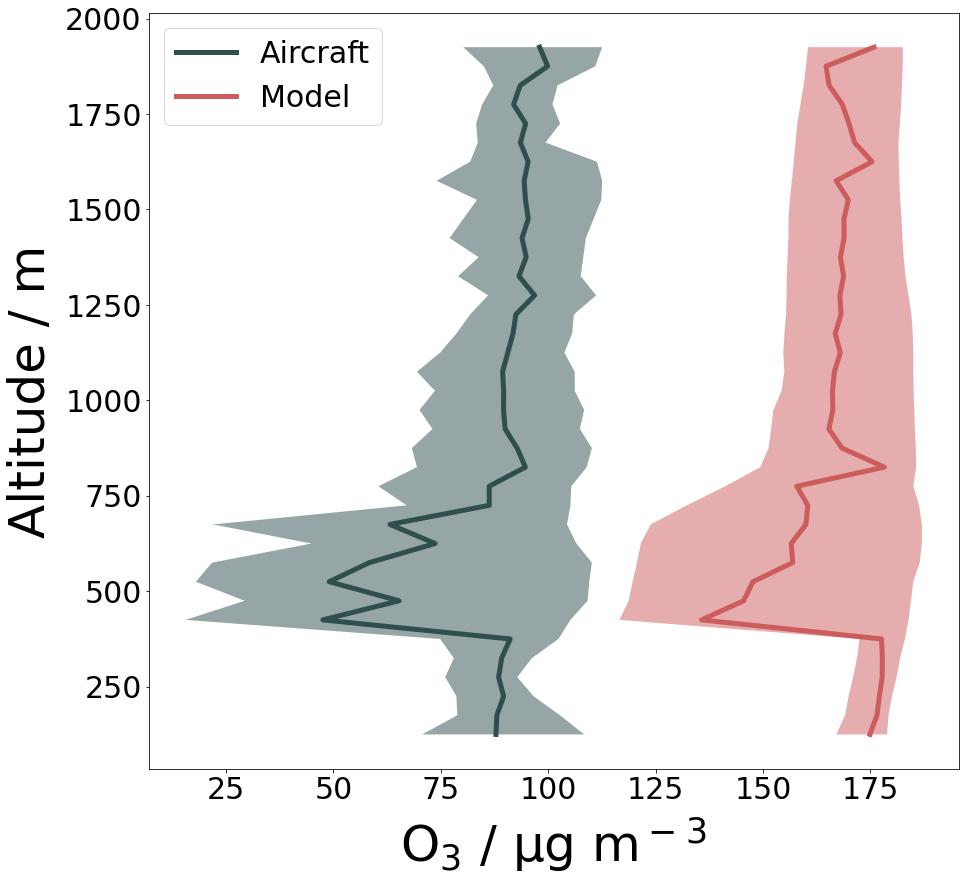

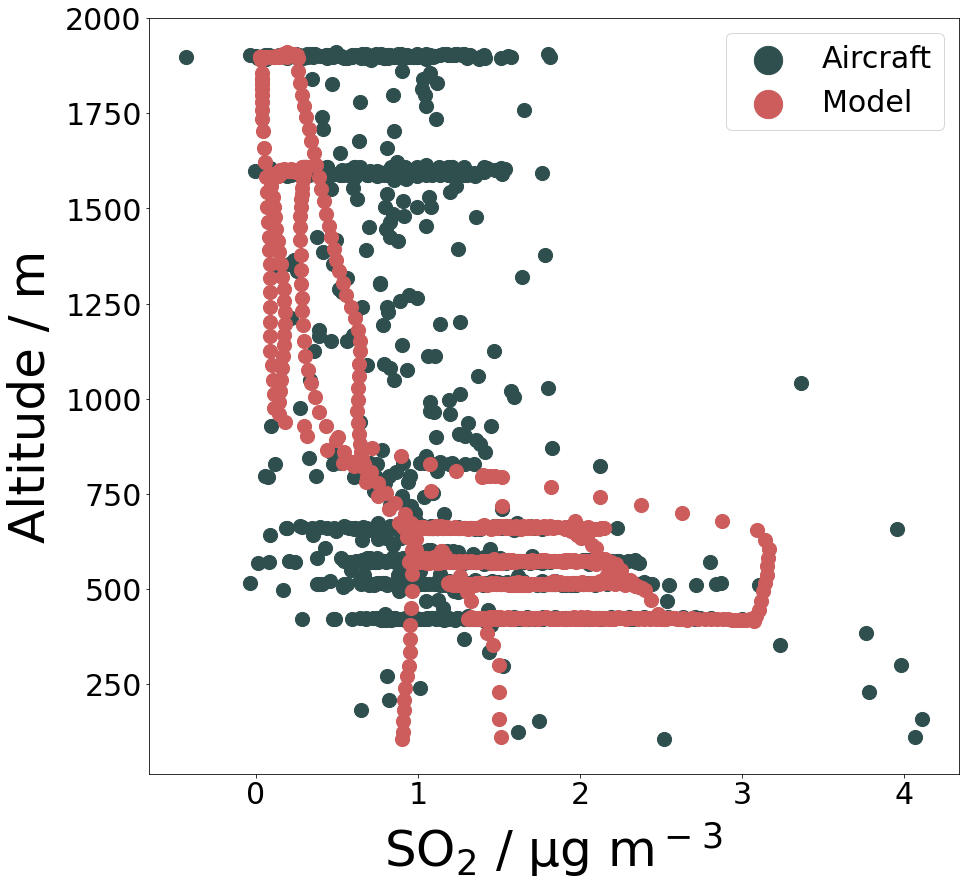

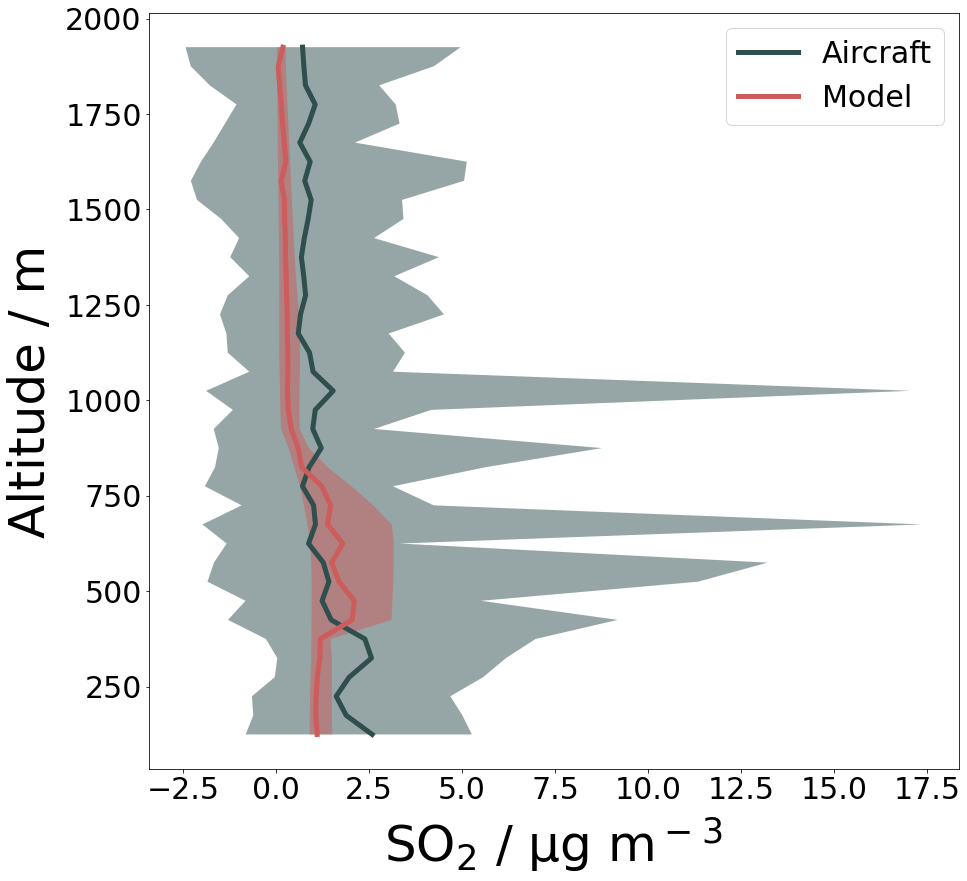

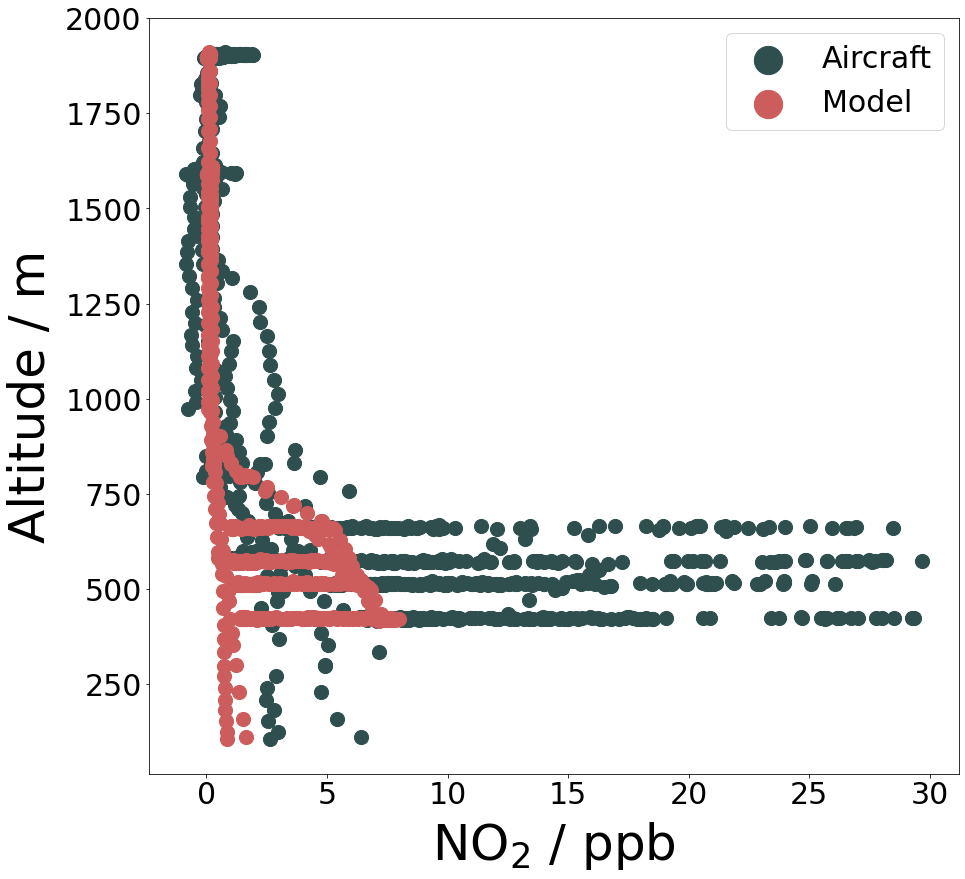

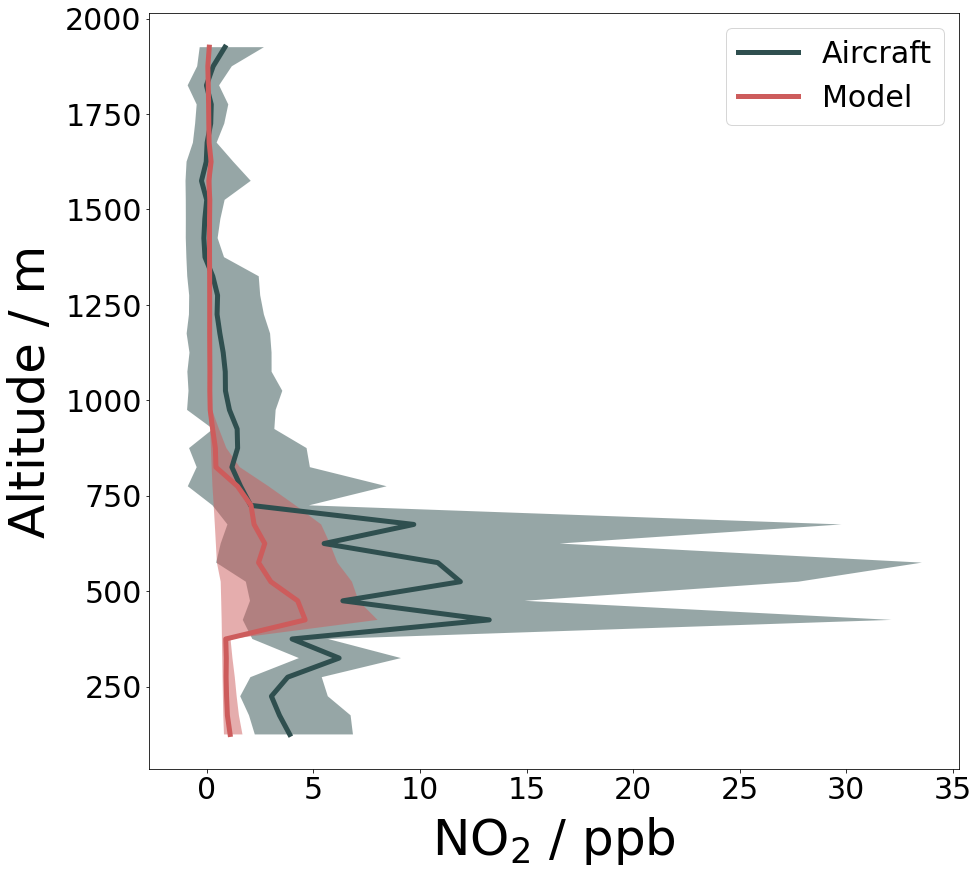

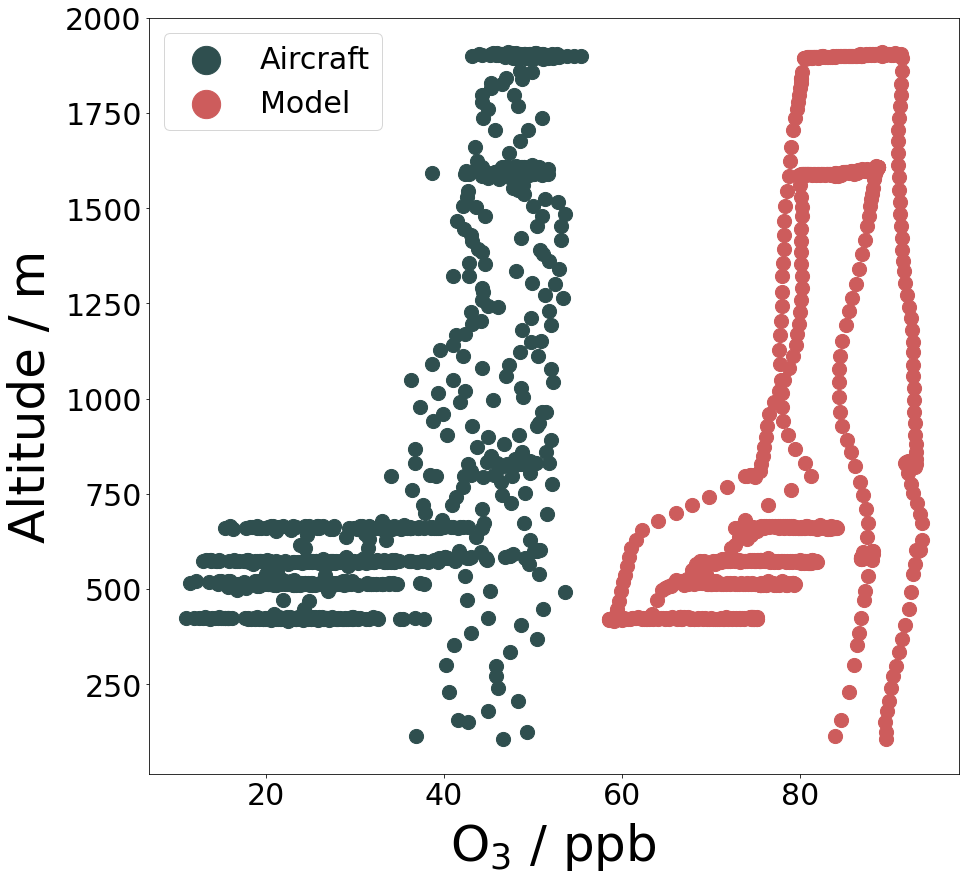

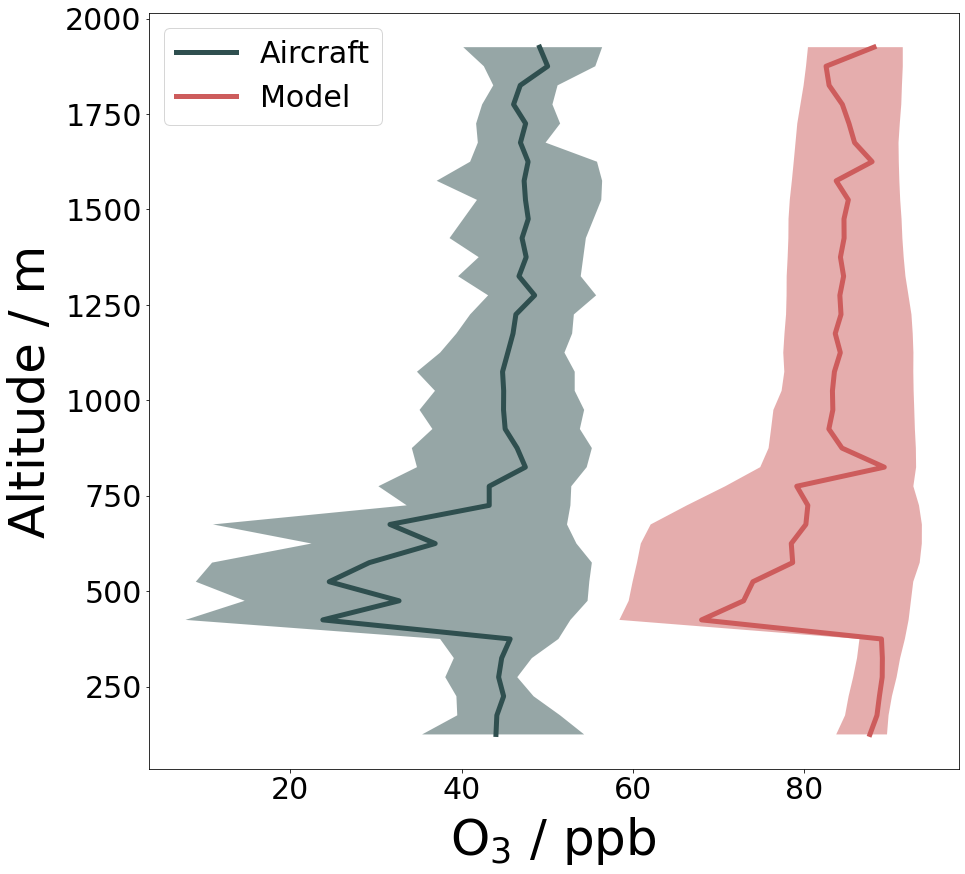

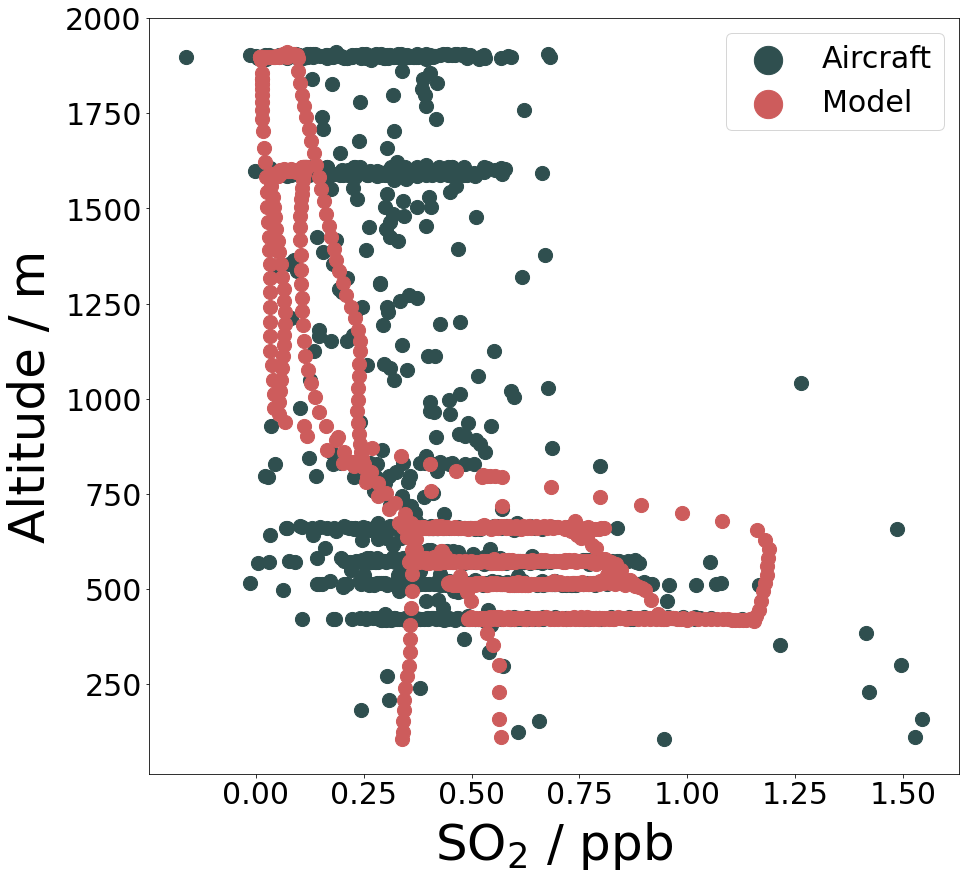

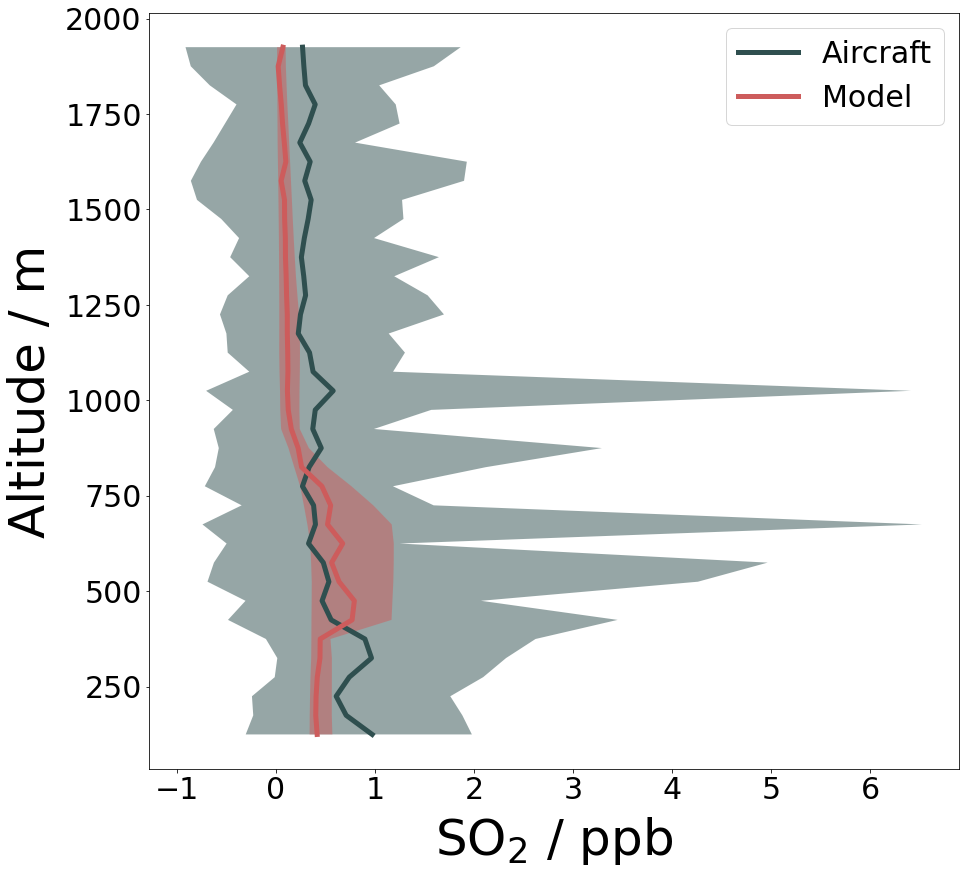

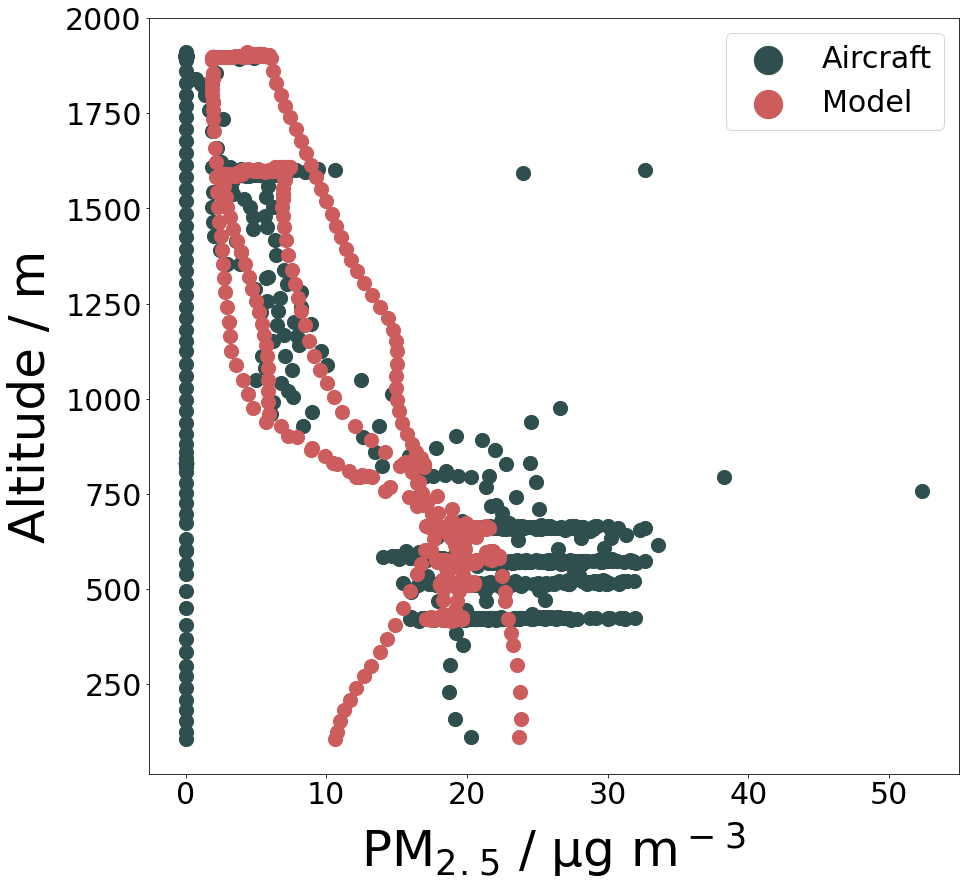

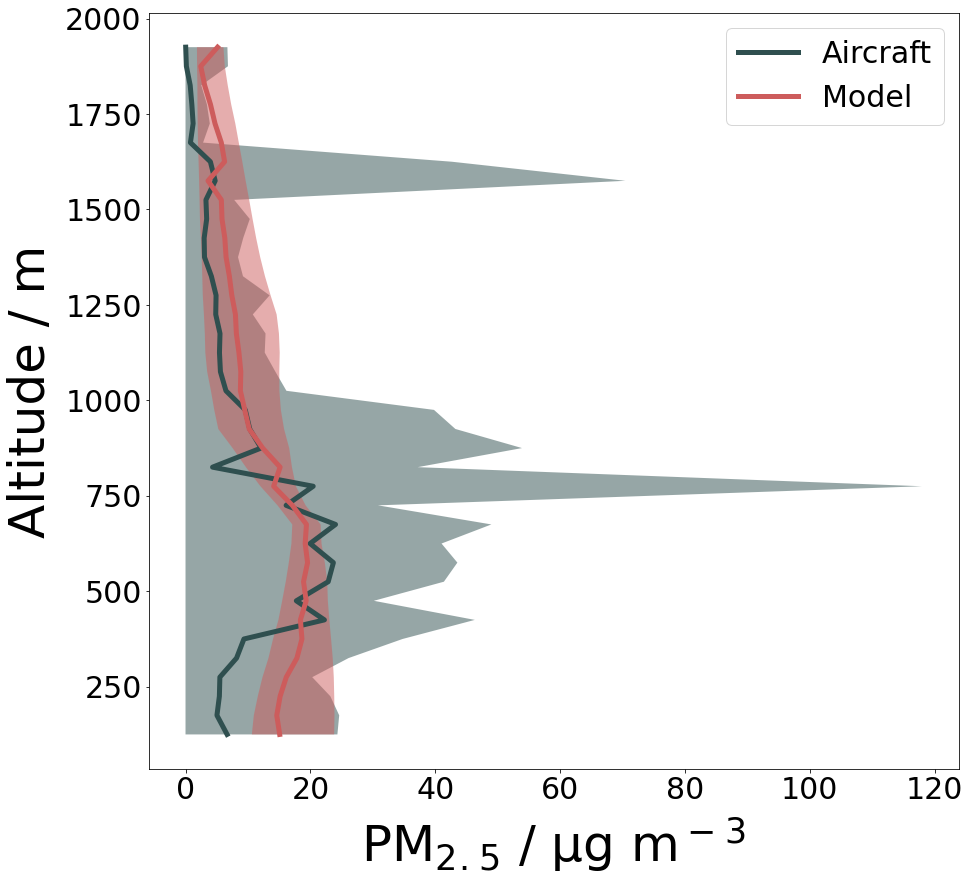

In [4]:
species_dict = pre.species_dictionary()
setup = pre.setup_notebook(flight_number)
optns = setup[6]
for key in species_dict.keys() :
    code,label,column_key,unit_conv = species_dict[key]['code'],species_dict[key]['label'],species_dict[key]['column_key'],species_dict[key]['unit_conv']

        # Combine the aircraft and model data.
    df = pre.combine_data(setup,code)

        # Resample the data.
    resample_df = pre.resample_data(df,optns['resample_time'],optns['avg_method'],optns['min_method'],optns['max_method'])
    
    plot_altitude_profile(df,resample_df,setup[5],key,label,optns['a_colour'],optns['m_colour'],optns['alt_bin'],optns['avg_method'],optns['min_method'],optns['max_method'])